In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load excel file:
kpmg_data = 'C:/Users/user/Desktop/KPMG_VI_New_raw_data_update_final.xlsx'

# Read each sheet into separate Dataframe:
transc = pd.read_excel(kpmg_data, sheet_name = 'Transactions')
new_cust = pd.read_excel(kpmg_data, sheet_name = 'NewCustomerList')
cust_dem = pd.read_excel(kpmg_data, sheet_name = 'CustomerDemographic')
cust_addr = pd.read_excel(kpmg_data, sheet_name = 'CustomerAddress')



In [33]:
transc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [48]:
transc[['customer_id']].value_counts().nunique()

14

<Axes: xlabel='customer_id', ylabel='standard_cost'>

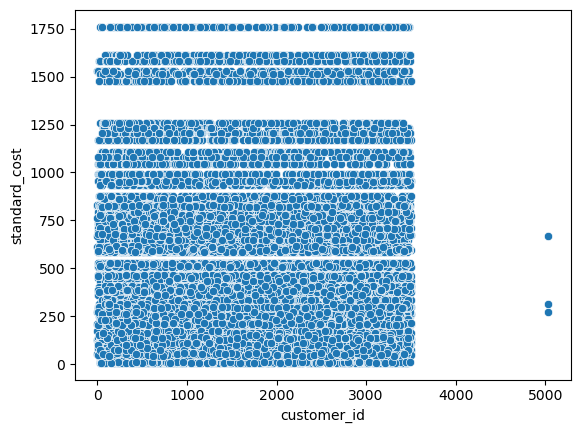

In [52]:
sns.scatterplot(x= 'customer_id', y= 'standard_cost', data = transc)

In [34]:
cust_dem.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [42]:
cust_dem[['customer_id']].value_counts().idxmax()

(1,)

In [36]:
cust_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [7]:
new_cust.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.64,0.8,1.0,0.85,1,1,1.71875


In [8]:
# checking the datatypes
cust_dem.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object

In [9]:
# CUSTOMER DEMOGRAPHIC

# a function to check for missing values i.e. 'isnull()'
cust_dem_missingdata = cust_dem.isnull()
cust_dem_missingdata.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False


In [10]:
# a for loop that shows the number of missing values in eacn column:

for column in cust_dem_missingdata.columns.values.tolist():
    print(cust_dem_missingdata[column].value_counts())
    print("")

customer_id
False    4000
Name: count, dtype: int64

first_name
False    4000
Name: count, dtype: int64

last_name
False    3875
True      125
Name: count, dtype: int64

gender
False    4000
Name: count, dtype: int64

past_3_years_bike_related_purchases
False    4000
Name: count, dtype: int64

DOB
False    3913
True       87
Name: count, dtype: int64

job_title
False    3494
True      506
Name: count, dtype: int64

job_industry_category
False    3344
True      656
Name: count, dtype: int64

wealth_segment
False    4000
Name: count, dtype: int64

deceased_indicator
False    4000
Name: count, dtype: int64

default
False    3698
True      302
Name: count, dtype: int64

owns_car
False    4000
Name: count, dtype: int64

tenure
False    3913
True       87
Name: count, dtype: int64



In [11]:
# 'last_name' = 125 
# 'DOB' = 87
# 'Job_title' = 506
# 'job_industry_category' = 656
# 'default' = 302
# 'tenure' = 87

In [12]:
# Checking for the most frequent job title :

common_job_title = cust_dem['job_title'].value_counts().idxmax()
common_job_title

'Business Systems Development Analyst'

In [13]:
# Checking for duplicates

columns_with_duplicates = {}

# Loop through each column to check for duplicates
for column in cust_dem.columns:
    if cust_dem[column].duplicated().any():
        # Store duplicate values
        columns_with_duplicates[column] = cust_dem[column][cust_dem[column].duplicated()]

# Print columns with duplicate values
for column, values in columns_with_duplicates.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

Column 'first_name' has duplicate values:
61         Sorcha
95          Heath
146           Rea
167        Reggie
228        Vaughn
          ...    
3992         Andi
3995      Rosalia
3996       Blanch
3998    Patrizius
3999        Kippy
Name: first_name, Length: 861, dtype: object

Column 'last_name' has duplicate values:
66                NaN
105               NaN
138               NaN
179           Neasham
196               NaN
            ...      
3964           Dumphy
3976    Van der Beken
3985         Petrello
3996           Nisuis
3998              NaN
Name: last_name, Length: 274, dtype: object

Column 'gender' has duplicate values:
2         Male
3         Male
5         Male
6       Female
7         Male
         ...  
3995    Female
3996    Female
3997         U
3998      Male
3999      Male
Name: gender, Length: 3994, dtype: object

Column 'past_3_years_bike_related_purchases' has duplicate values:
15      38
21      79
24      72
35      33
37      37
        ..
3995   

In [14]:
# Checking for whitespaces:
def check_whitespaces(cust_dem):
    for column in cust_dem.columns:
        if cust_dem[column].dtype == 'object': # checks only string columns
            whitespaces = cust_dem[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(cust_dem[whitespaces])

# Run the function:
check_whitespaces(cust_dem)

Column 'default' has whitespaces in the following rows:
      customer_id first_name  last_name  gender  \
127           128     Isidro     Cypler    Male   
133           134      Merna  McCulloch  Female   
168           169       Alfy    Bruhnke    Male   
216           217    Jeralee    Quartly  Female   
283           284       Seth    Moorman    Male   
...           ...        ...        ...     ...   
3917         3918    Rosalia     Skedge  Female   
3919         3920    Filbert   Deetlefs    Male   
3992         3993       Andi    Dumelow  Female   
3994         3995      Rusty     Iapico    Male   
3998         3999  Patrizius        NaN    Male   

      past_3_years_bike_related_purchases                  DOB  \
127                                    73  1977-07-17 00:00:00   
133                                    34  1997-08-01 00:00:00   
168                                    20  1957-10-19 00:00:00   
216                                    63  1979-12-09 00:00:00   
2

In [15]:
# Trim whitespaces from all string columns
# df_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [16]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [17]:
# Customer address:

In [18]:
# checking for missing data in the customer address table
missing_cust_addr = cust_addr.isnull()
missing_cust_addr

,customer_id,address,postcode,state,country,property_valuation
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3994,False,False,False,False,False,False
3995,False,False,False,False,False,False
3996,False,False,False,False,False,False
3997,False,False,False,False,False,False


In [19]:
for column in missing_cust_addr.columns.values.tolist():
    print(missing_cust_addr[column].value_counts())
    print("")

customer_id
False    3999
Name: count, dtype: int64

address
False    3999
Name: count, dtype: int64

postcode
False    3999
Name: count, dtype: int64

state
False    3999
Name: count, dtype: int64

country
False    3999
Name: count, dtype: int64

property_valuation
False    3999
Name: count, dtype: int64



In [20]:
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [21]:
cust_addr.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [22]:
# Checking for duplicates

cust_addr_duplicates = {}

# Loop through each column to check for duplicates
for column in cust_addr.columns:
    if cust_addr[column].duplicated().any():
        # Store duplicate values
        cust_addr_duplicates[column] = cust_addr[column][cust_addr[column].duplicated()]

# Print columns with duplicate values
for column, values in cust_addr_duplicates.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

Column 'address' has duplicate values:
2470           3 Talisman Place
2980    3 Mariners Cove Terrace
3535     64 Macpherson Junction
Name: address, dtype: object

Column 'postcode' has duplicate values:
18      2650
19      2153
26      2135
44      2210
60      2153
        ... 
3994    3064
3995    4511
3996    2756
3997    4032
3998    2251
Name: postcode, Length: 3126, dtype: int64

Column 'state' has duplicate values:
1       New South Wales
3       New South Wales
5       New South Wales
6       New South Wales
7       New South Wales
             ...       
3994                VIC
3995                QLD
3996                NSW
3997                QLD
3998                NSW
Name: state, Length: 3994, dtype: object

Column 'country' has duplicate values:
1       Australia
2       Australia
3       Australia
4       Australia
5       Australia
          ...    
3994    Australia
3995    Australia
3996    Australia
3997    Australia
3998    Australia
Name: country, Length: 3998,

In [23]:
# Checking for whitespaces:
def check_whitespaces(cust_addr):
    for column in cust_addr.columns:
        if cust_addr[column].dtype == 'object': # checks only string columns
            whitespaces = cust_addr[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(cust_addr[whitespaces])
            else:
                print("There are no whitespaces in this data")

# Run the function:
check_whitespaces(cust_addr)

There are no whitespaces in this data
There are no whitespaces in this data
There are no whitespaces in this data


In [24]:
transc.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [25]:
# Let's check the datatype for this data:
transc.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [26]:
transc.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [27]:
# Checking for the completeness of the data by getting missing values in the transc data if there is:

missing_transc = transc.isnull()

for column in missing_transc.columns.values.tolist():
    print(missing_transc[column].value_counts())
    print("")

transaction_id
False    20000
Name: count, dtype: int64

product_id
False    20000
Name: count, dtype: int64

customer_id
False    20000
Name: count, dtype: int64

transaction_date
False    20000
Name: count, dtype: int64

online_order
False    19640
True       360
Name: count, dtype: int64

order_status
False    20000
Name: count, dtype: int64

brand
False    19803
True       197
Name: count, dtype: int64

product_line
False    19803
True       197
Name: count, dtype: int64

product_class
False    19803
True       197
Name: count, dtype: int64

product_size
False    19803
True       197
Name: count, dtype: int64

list_price
False    20000
Name: count, dtype: int64

standard_cost
False    19803
True       197
Name: count, dtype: int64

product_first_sold_date
False    19803
True       197
Name: count, dtype: int64



In [28]:
# 'online_order' : 360 missing values
# 'Brand' : 197 missing values
# 'product_line' : 197 missing values
# 'product_class' : 197 missing values
# 'product_size' : 197 missing values
# 'product_cost' : 197 missing values
# 'product-first-sold-date : 197 missing values

In [29]:
# Checking for duplicates

transc_duplicates = {}

# Loop through each column to check for duplicates
for column in transc.columns:
    if transc[column].duplicated().any():
        # Store duplicate values
        transc_duplicates[column] = transc[column][transc[column].duplicated()]

# Print columns with duplicate values
for column, values in transc_duplicates.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

Column 'product_id' has duplicate values:
14       12
15        3
19       25
21       37
22       37
         ..
19995    51
19996    41
19997    87
19998     6
19999    11
Name: product_id, Length: 19899, dtype: int64

Column 'customer_id' has duplicate values:
47       1305
82       3398
125       773
147      3262
148       788
         ... 
19995    1018
19996     127
19997    2284
19998    2764
19999    1144
Name: customer_id, Length: 16506, dtype: int64

Column 'transaction_date' has duplicate values:
24      2017-06-11
56      2017-08-30
57      2017-11-14
61      2017-12-18
74      2017-06-20
           ...    
19995   2017-06-24
19996   2017-11-09
19997   2017-04-14
19998   2017-07-03
19999   2017-09-22
Name: transaction_date, Length: 19636, dtype: datetime64[ns]

Column 'online_order' has duplicate values:
2        0.0
3        0.0
4        1.0
5        1.0
6        1.0
        ... 
19995    1.0
19996    1.0
19997    1.0
19998    0.0
19999    1.0
Name: online_order, Length: 

In [30]:
# Checking for whitespaces:
def whitespaces_transc(transc):
    for column in transc.columns:
        if transc[column].dtype == 'object': # checks only string columns
            whitespaces = transc[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(transc[whitespaces])
            else:
                print("There are no whitespaces in this data")

# Run the function:
whitespaces_transc(transc)

There are no whitespaces in this data
There are no whitespaces in this data
There are no whitespaces in this data
There are no whitespaces in this data
There are no whitespaces in this data
